## ------- SCC-ICMC-USP - 2025/2 -------

**SCC0275** - Introdução a Ciencia de Dados

**Profª Roseli A. F. Romero**  
**Monitores:**
- Thiago Rafael
- Paulo Henrique

#### Atividade 2 - 18/08/2025

**Formalização do Grupo (Nome e NUSP)**
- Integrante 1: Pedro Guilherme de Barros Zenatte - 13676919
- Integrante 2:

---

Para esta lista de exercícios, considere a base de dados de salários de jogadores de futebol obtida pelo [Kaggle](https://www.kaggle.com/datasets/ultimus/football-wages-prediction) (também disponibilizada no Tidia com o nome de *SalaryPrediction.csv*)
```

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Celula de importacoes mais utilizadas (sinta-se livre para adicionar mais)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Item 1** - Calcule os percentis 10, 25, 50, 75 e 90 da variável Age (idade). Descreva o que significa dizer que a idade de um jogador está no percentil 75.

In [18]:
# Carregar arquivo CSV
dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SalaryPrediction.csv")

# Transformando dados com vígula, como 27,000, em dados com ., como 27.000
dados['Wage'] = dados['Wage'].str.replace(',', '', regex=False).astype(float)

# Cálculo dos percentis
percentis = dados["Age"].quantile([0.10, 0.25, 0.50, 0.75, 0.90])

# Tabela
tabela_percentis = pd.DataFrame({
    "Percentil": ["10%", "25%", "50%", "75%", "90%"],
    "Valor": percentis.values
})

print(tabela_percentis.to_string(index=False))

Percentil  Valor
      10%   18.0
      25%   20.0
      50%   24.0
      75%   28.0
      90%   31.0


Dizer que a idade de um jogador está no percentil 75 significa que ele é mais velho do que 75% dos jogadores, enquanto apenas 25% possuem idade superior à dele

**Item 2** - Considere a coluna Wage (salário)
- Calcule os valores de média, mediana, mínimo, máximo e desvio padrão. Os salários estão mais próximos da média ou há forte dispersão?
- A partir do cálculo dos quartis, explique como o IQR ajuda na identificação de valores atípicos.

In [ ]:
# Transformando dados com vígula, como 27,000, em dados com ., como 27.000
dados['Wage'] = dados['Wage'].str.replace(',', '', regex=False).astype(float)

media = dados["Wage"].mean()
mediana = dados["Wage"].median()
minimo = dados["Wage"].min()
maximo = dados["Wage"].max()
desvio_padrao = dados["Wage"].std()

tabela_medidas = pd.DataFrame({
    "Média": [media],
    "Mediana": [mediana],
    "Mínimo": [minimo],
    "Máximo": [maximo],
    "Desvio Padrão": [desvio_padrao]
})

print(tabela_medidas.to_string(index=False))

       Média  Mediana  Mínimo     Máximo  Desvio Padrão
1.367959e+06 399000.0  1400.0 46427000.0   2.589857e+06


Lembrando que os quartis já estão calculados, uma vez que são os são os percentis 25%, 50% e 75%, ou seja, os pontos que dividem os dados em quatro partes iguais, podemos dizer que o INTERQUARTIL (IQR), calculado por Q3 - Q1, representa a dispersão central dos dados, ou seja, a faixa que concentra os 50% valores centrais. A partir dele, é possível estabelecer limites que ajudam a identificar valores atípicos, que são os outliers. O limite inferior é definido como o primeiro quartil menos 1,5 vezes o IQR, enquanto o limite superior corresponde ao terceiro quartil acrescido de 1,5 vezes o IQR. Todos os valores que se encontram abaixo do limite inferior ou acima do limite superior são classificados como os tais outliers. Dessa forma, esses limites funcionam como uma margem de tolerância construída a partir do comportamento esperado dos dados, permitindo distinguir observações normais de pontos discrepantes.


**Item 3** - Considerando a coluna Wage (salário):
- Interprete os valores atípicos graficamente. Tratam-se de erros de coleta ou características reais?
- Codifique um _boxplot_ modificado (sem _outliers_) e, em comparação com o gráfico original responda: a presença ou ausência de outliers altera a percepção da mediana e da dispersão?

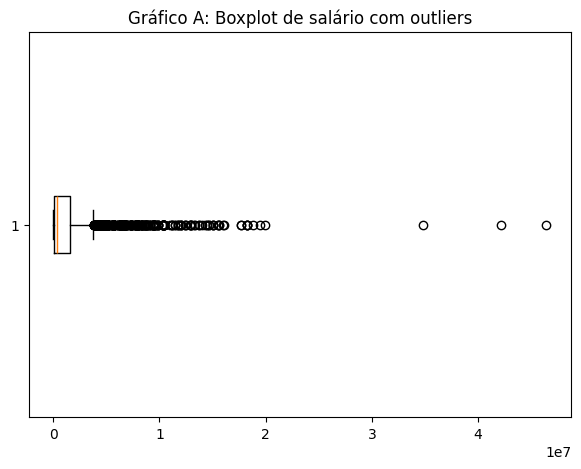

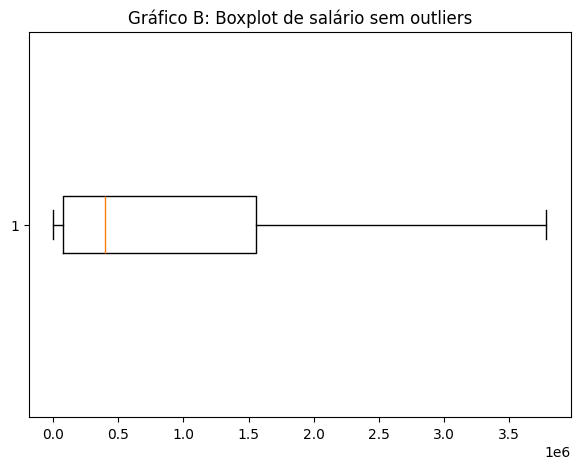

In [ ]:
x = dados["Wage"].dropna()

# BOXPLOT com outliers
plt.figure(figsize=(7, 5))
plt.boxplot(x, vert=False, showfliers=True)
plt.title("Gráfico A: Boxplot de salário com outliers")
plt.show()

# BOXPLOT sem outliers
plt.figure(figsize=(7, 5))
plt.boxplot(x, vert=False, showfliers=False)  # agora sem outliers
plt.title("Gráfico B: Boxplot de salário sem outliers")
plt.show()

Considerando o gráfico A, torna-se plausível depreender que os valores atípicos na realidade são características reais, principalmente quando se leva em conta o contexto de salário de jogadores de futebol, em que a maioria dos jogadores recebem um salário mediano enquanto outros que se destacam muito recebem salários foras do padrão. Dessa forma, a única maneira de considerarmos como erros de coleta seria em casos de salários negativos.
Nesse caso, há muitos jogadores com o salário mediano, então a não presença dos outliers nao altera a percepção da mediana, porém no caso da dispersão muda muito, pois com outliers parece que todos os salários estão concentrados em uma faixa baixa com raros casos altíssimos, enquanto que sem outliers, fica mais fácil visualizar a variação “normal” dos salários.

**Item 4** - Compare as medidas de dispersão entre as variáveis Wage (salário) e Age (idade). Qual delas apresenta maior variabilidade relativa?

In [ ]:
# Medidas de tendência central e dispersão
media_wage = dados["Wage"].mean()
std_wage   = dados["Wage"].std()

media_age = dados["Age"].mean()
std_age   = dados["Age"].std()

# Coeficiente de variação
cv_wage = std_wage / media_wage
cv_age  = std_age  / media_age

print("CV Salário:", cv_wage)
print("CV Idade:", cv_age)

CV Salário: 1.893226377343483
CV Idade: 0.2046237712202466


Por conta de que os salários possuem um CV maior, torna-se possível dizer que os salários possuem uma maior variabilidade relativa.

**Item 5** - Para a variável Position calcule a contagem de jogadores em cada posição. Dada a média e o desvio padrão do Wage (salário) por posição analise quais posições têm maior variação salarial.

In [ ]:
# Contagem de jogadores em cada posição
contagem_posicoes = dados["Position"].value_counts()
print(contagem_posicoes)
print("\n")

# Cálculos estatísticos
estatisticas_wage = dados.groupby("Position")["Wage"].agg(["mean", "std"]).reset_index()
estatisticas_wage.rename(columns={"mean": "Média", "std": "Desvio Padrão"}, inplace=True)

print(estatisticas_wage)

Position
Defender      1490
Midfilder     1160
Forward        827
Goalkeeper     430
Name: count, dtype: int64


     Position         Média  Desvio Padrão
0    Defender  1.299439e+06   2.159837e+06
1     Forward  1.342720e+06   3.113081e+06
2  Goalkeeper  1.017645e+06   2.142149e+06
3   Midfilder  1.603824e+06   2.810448e+06


Os Forwards apresentam o maior desvio padrão dos salários, indicando que essa é a posição com maior desigualdade, pois alguns jogadores recebem salários muito elevados, enquanto outros recebem valores bem menores. Os Midfielders também possuem alta variação, apesar de apresentarem a maior média salarial entre as posições. Já os Defenders e os Goalkeepers exibem desvios padrão menores em comparação, o que revela uma distribuição salarial mais homogênea dentro desses grupos. Assim, pode-se concluir que as posições ofensivas, em especial os atacantes, concentram as maiores disparidades salariais.

**Item 6** - Calcule a correlação de Pearson entre Wage e Age, Wage e Apps, e Wage e Caps.
- Interprete se a relação é forte, fraca ou inexistente e sugira hipóteses para essas correlações.

In [19]:
# Atribuindo as variáveis de interesse
correlacoes = dados[["Wage", "Age", "Apps", "Caps"]].corr(method="pearson")

# criar tabela apenas com a correlação em relação ao Wage
#tabela_corr = correlacoes[["Wage"]].drop("Wage").reset_index()
tabela_corr = correlacoes[["Wage"]].reset_index()
tabela_corr.columns = ["Variável", "Correlação com Wage"]

print(tabela_corr.to_string(index=False))

Variável  Correlação com Wage
    Wage             1.000000
     Age             0.317644
    Apps             0.418255
    Caps             0.564621


Correlação entre salário e idade é fraca, e a hipótese é que a idade tem alguma influência sobre o salário, mas não é determinante, uma vez que jogadores jovens muito promissores ou veteranos renomados podem ter salários altos, enquanto idades intermediárias podem não ter o mesmo prestígio.
Correlação entre Apps é moderada, já que jogadores que atuam em mais partidas tendem a receber salários maiores, o que faz sentido.
Correlação entre Caps é forte (acima de 50%), e isso se dá por conta que jogadores com mais convocações para a seleção (Caps) recebem, em geral, salários mais altos, ainda mais por possuirem mais prestígio, inclusive internacional.

**Item 7** - Gere uma matriz de correlação para todas as variáveis numéricas e identifique o par de variáveis com maior correlação positiva e negativa.

In [20]:
# Select only numeric columns for correlation calculation
numeric_cols = dados.select_dtypes(include=np.number)

# Matriz de correlação
matriz_corr = numeric_cols.corr(method="pearson")

print(matriz_corr)

          Wage       Age      Apps      Caps
Wage  1.000000  0.317644  0.418255  0.564621
Age   0.317644  1.000000  0.926338  0.454460
Apps  0.418255  0.926338  1.000000  0.531692
Caps  0.564621  0.454460  0.531692  1.000000


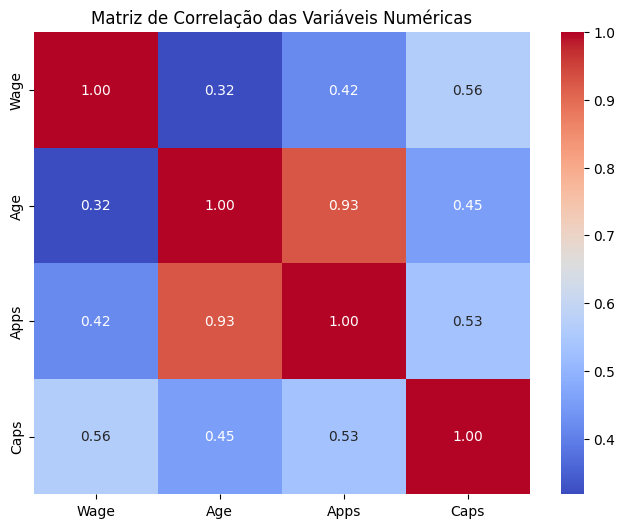

In [21]:
# Plotar mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

Vamos desconsiderar o par da mesma variável, uma vez que sempre será 1. Nesse sentido, o par de variáveis com maior correlação positiva é Age e Apps, com valor de 0,926.
Não foi identificada nenhuma correlação negativa entre as variáveis analisadas.

**Item 8** - Considere as variáveis League, Age (idade), Apps (número de aparições pelo clube) e Caps (número de aparições pela seleção), **e para cada liga**, calcule:

1. Idade média dos jogadores
2. Idade mediana
3. Amplitude da idade
4. Verifique se há correlação entre idade e número de jogos no clube (Apps) e entre idade e número de jogos pela seleção (Caps).
5. Plote gráficos de dispersão para cada correlação, diferenciando pontos por liga.
6. Analise se ligas com jogadores mais velhos tendem a ter jogadores mais experientes internacionalmente.

              League      media  mediana  amplitude
0         Bundesliga  24.317774     24.0         20
1            La Liga  25.239057     25.0         23
2  Ligue 1 Uber Eats  25.525862     25.0         23
3     Premier League  23.189714     22.0         22
4      Primiera Liga  23.065596     22.0         23
5            Serie A  24.383582     24.0         23


           League  Corr(Age, Apps)  Corr(Age, Caps)
       Bundesliga         0.938479         0.456691
          La Liga         0.945257         0.389474
Ligue 1 Uber Eats         0.892674         0.354375
   Premier League         0.941086         0.591912
    Primiera Liga         0.918919         0.356412
          Serie A         0.931861         0.515522




/tmp/ipython-input-3973696177.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlacoes = dados.groupby("League").apply(


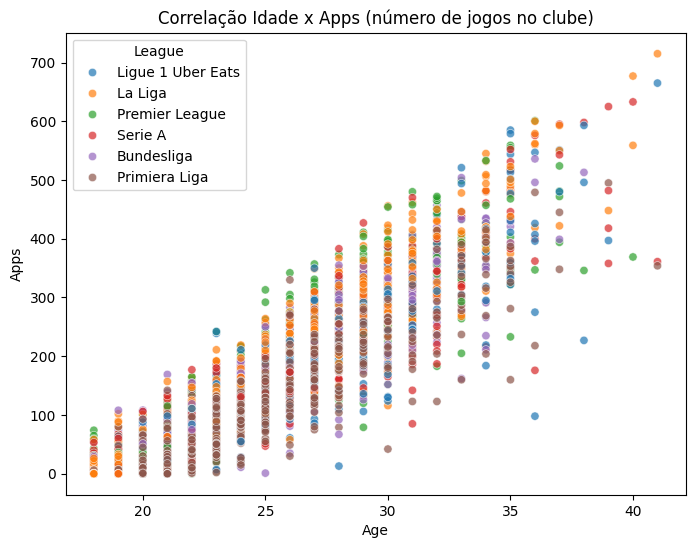

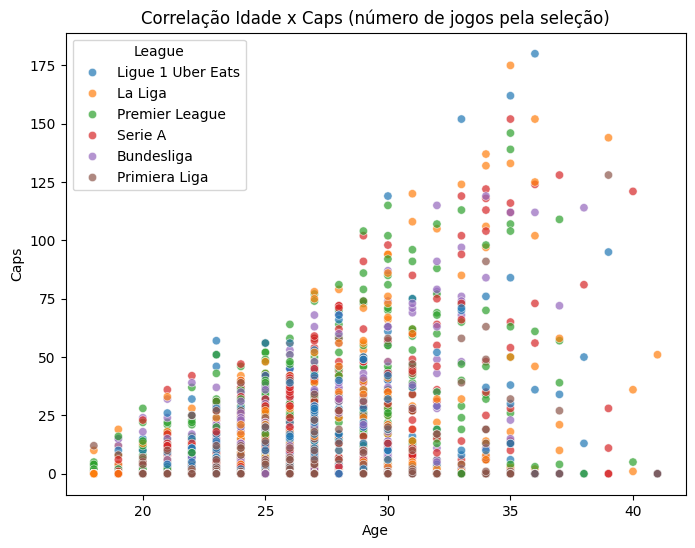

In [ ]:
# Idade média, mediana e amplitude dos jogadores
estatisticas_idade = dados.groupby("League")["Age"].agg(
    media="mean",
    mediana="median",
    amplitude=lambda x: x.max() - x.min()
).reset_index()

print(estatisticas_idade)
print("\n")

# Correlações
correlacoes = dados.groupby("League").apply(
    lambda df: pd.Series({
        "Corr(Age, Apps)": df["Age"].corr(df["Apps"]),
        "Corr(Age, Caps)": df["Age"].corr(df["Caps"])
    })
).reset_index()

print(correlacoes.to_string(index=False))
print("\n")

import seaborn as sns
# Gráficos de dispersão
# Age x Apps
plt.figure(figsize=(8,6))
sns.scatterplot(data=dados, x="Age", y="Apps", hue="League", alpha=0.7)
plt.title("Correlação Idade x Apps (número de jogos no clube)")
plt.show()

# Age x Caps
plt.figure(figsize=(8,6))
sns.scatterplot(data=dados, x="Age", y="Caps", hue="League", alpha=0.7)
plt.title("Correlação Idade x Caps (número de jogos pela seleção)")
plt.show()

Há uma forte correlação positiva entre idade e número de jogos no clube, mostrando que jogadores mais velhos acumulam mais partidas ao longo da carreira. Já a correlação entre idade e jogos pela seleção é moderada, indicando que, além da idade, fatores como talento e prestígio influenciam as convocações.

Pelos dados, temos que ligas com jogadores mais velhos não necessariamente concentram atletas mais experientes internacionalmente